In [1]:
# performing linear algebra
import numpy as np 
# data processing
import pandas as pd
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Dell/Desktop/Even Semester 2023/II Semester/customer_churn.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3145 non-null   float64
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3145 non-null   float64
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(3), int64(11)

In [205]:
# Data Understanding
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3145.000000,3150.000000,3145.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4473.570429,69.460635,73.091574,23.509841,2.826032,1.077778,1.248254,30.998413,470.073030,0.160000
std,7.263886,0.265851,8.573482,1.521072,4197.779738,57.413308,112.178023,17.217337,0.892555,0.267864,0.432069,8.831095,516.195543,0.366664
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1400.000000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.740000,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.365000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6473.000000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,787.230000,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [206]:
#dealing missing values
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             5
Frequency of use           0
Frequency of SMS           5
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [207]:
#Replacing missing values with mean
df['Seconds of Use'] = df['Seconds of Use'].fillna(df['Seconds of Use'].mean())
df['Frequency of SMS'] = df['Frequency of SMS'].fillna(df['Frequency of SMS'].mean())

In [208]:
#verify missing values
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [209]:
#defining X and y variable
X = np.array(df.iloc[0:, 1:])
X

array([[0.00000e+00, 3.80000e+01, 0.00000e+00, ..., 3.00000e+01,
        1.97640e+02, 1.00000e+00],
       [0.00000e+00, 3.90000e+01, 0.00000e+00, ..., 2.50000e+01,
        4.60350e+01, 1.00000e+00],
       [0.00000e+00, 3.70000e+01, 0.00000e+00, ..., 3.00000e+01,
        1.53652e+03, 1.00000e+00],
       ...,
       [0.00000e+00, 1.80000e+01, 4.00000e+00, ..., 3.00000e+01,
        2.80320e+02, 0.00000e+00],
       [0.00000e+00, 1.10000e+01, 2.00000e+00, ..., 3.00000e+01,
        1.07764e+03, 0.00000e+00],
       [1.00000e+00, 1.10000e+01, 2.00000e+00, ..., 3.00000e+01,
        1.00680e+02, 1.00000e+00]])

In [210]:
y = np.array(df['Churn'])

In [211]:
X.shape

(3150, 13)

In [212]:
y.shape

(3150,)

In [213]:
# using training and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

In [214]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8428571428571429

In [2]:
#Prediction on training data
y_train_predict=knn.predict(X_train)
#confusion matrix
import seaborn as sns 
from sklearn.metrics import confusion_matrixdecd4edc4c45r 
from sklearn.metrics import precision_score, recall_score, f1_score
classnames=['0','1']
confusionmatrix=confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='g',cmap="Greens");

NameError: name 'knn' is not defined

In [3]:
from sklearn import metrics
print ("Accuracy:",metrics.accuracy_score(y_train,y_train_predict))
print('Precision Score: %.3f' % precision_score(y_train,y_train_predict))
print('Recall Score: %.3f' % recall_score(y_train,y_train_predict))
print('F1 Score: %.3f' % f1_score(y_train,y_train_predict))


NameError: name 'y_train' is not defined

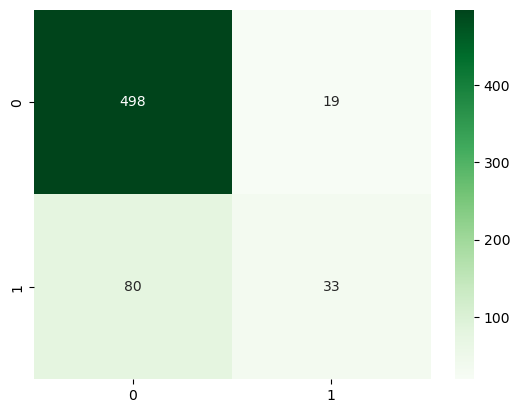

In [217]:
#Prediction on test data
y_train_predict=knn.predict(X_test)
#confusion matrix
import seaborn as sns 
from sklearn.metrics import confusion_matrix
classnames=['0','1']
confusionmatrix=confusion_matrix(y_test,y_train_predict)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='g',cmap="Greens");

In [218]:
from sklearn import metrics
print ("Accuracy:",metrics.accuracy_score(y_test,y_train_predict))
print('Precision Score: %.3f' % precision_score(y_test,y_train_predict))
print('Recall Score: %.3f' % recall_score(y_test,y_train_predict))
print('F1 Score: %.3f' % f1_score(y_test,y_train_predict))

Accuracy: 0.8428571428571429
Precision Score: 0.635
Recall Score: 0.292
F1 Score: 0.400


In [219]:
# predict for a new data 
result = knn.predict([[0,38,0,4370.0,71,5.0,17,3,1,1,30,197.64,1]])
if result == 1:
        print ("1")
else:
        print ("0")

0
